Автор: Лейман Максим  

Дата создания: 18.06.2025

# Промежуточная аттестация 4.  

## Поиск ключевых точек лица



In [13]:
!ls dataset/dataset_3

test	    test.csv  train_2	   train.csv	   training_renamed.csv
test_0.csv  train     train_2.csv  training_0.csv


# Импорты

In [14]:
from train.trainer import train
from data.dataset import FaceKeypointsDataset, annotation_transform, rename_images_and_update_csv, convert_xml_to_csv_with_renaming
from utils.visualization import img_show, show_batch_with_keypoints, show_image_with_predictions, show_original_image_with_predictions
from models.keypoint_net import KeypointNet



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
import torch
from torch.utils.data import Dataset, DataLoader



# 1) Датасет

## Преобразование аннотаций  

приведение аннотаций к одному виду

In [15]:
# annotation_transform(patch_in='dataset/dataset_2/annotations.xml', path_out='dataset/dataset_2/training.csv')


## Преобразование  названий изображений  

для совместного использования 

In [16]:
# Преобразование названий изображений 
# convert_xml_to_csv_with_renaming(
#     image_folder='dataset/dataset_2/images',
#     xml_path='dataset/dataset_2/annotations.xml',
#     csv_out_path='dataset/dataset_2/training_2.csv',
#     image_prefix=8000
# )


In [17]:
# rename_images_and_update_csv(
#     image_folder='dataset/dataset_4/train',
#     csv_path='dataset/dataset_4/train.csv',
#     csv_out_path='dataset/dataset_4/train_renamed.csv',
#     start_index=10000,
#     image_ext='.jpg'
# )


## Просмотр Изображений

#### Просмотр первого датасета

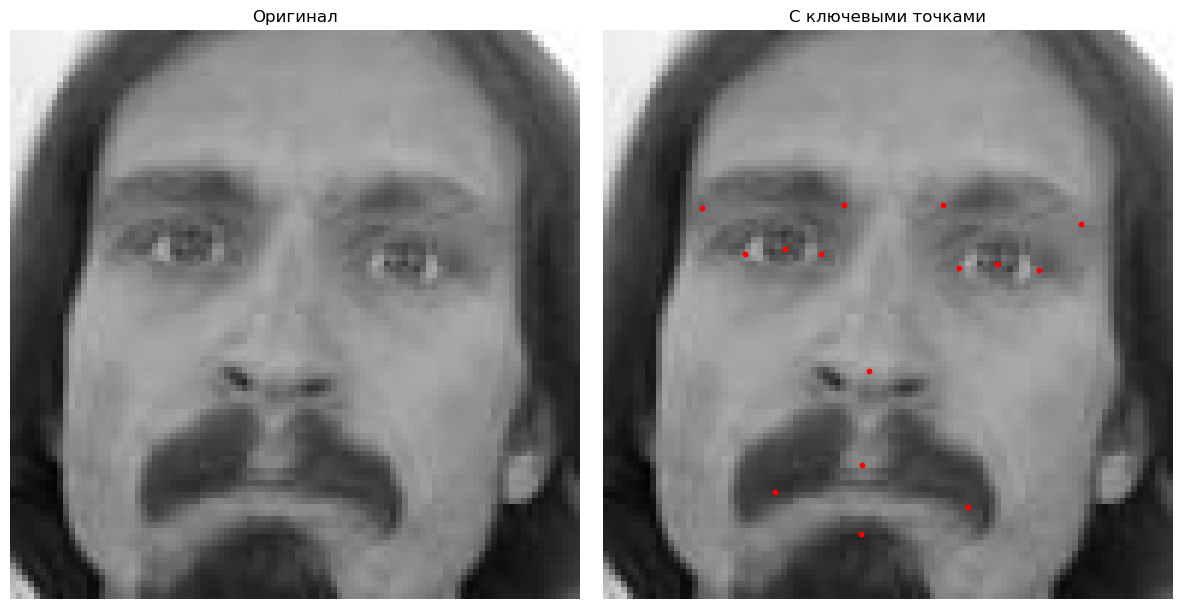

In [18]:
path_annotation='dataset/dataset_1/training.csv'
path_image='dataset/dataset_1/images'
img_show(path_image, path_annotation, 0)

#### Просмотр второго датасета 

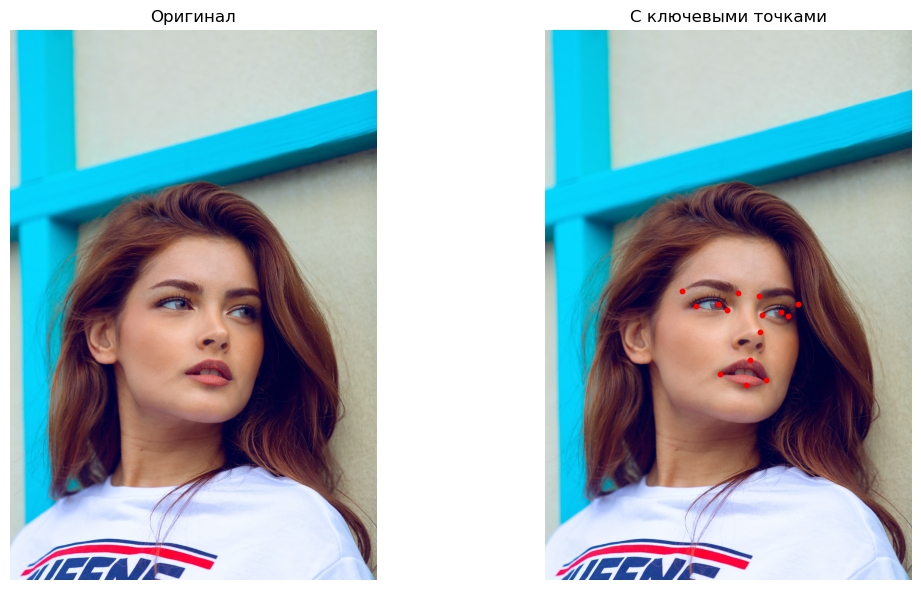

In [19]:
path_annotation='dataset/dataset_2/training.csv'
path_image='dataset/dataset_2/images'
img_show(path_image, path_annotation, 0)

#### Просмотр третьего датасета

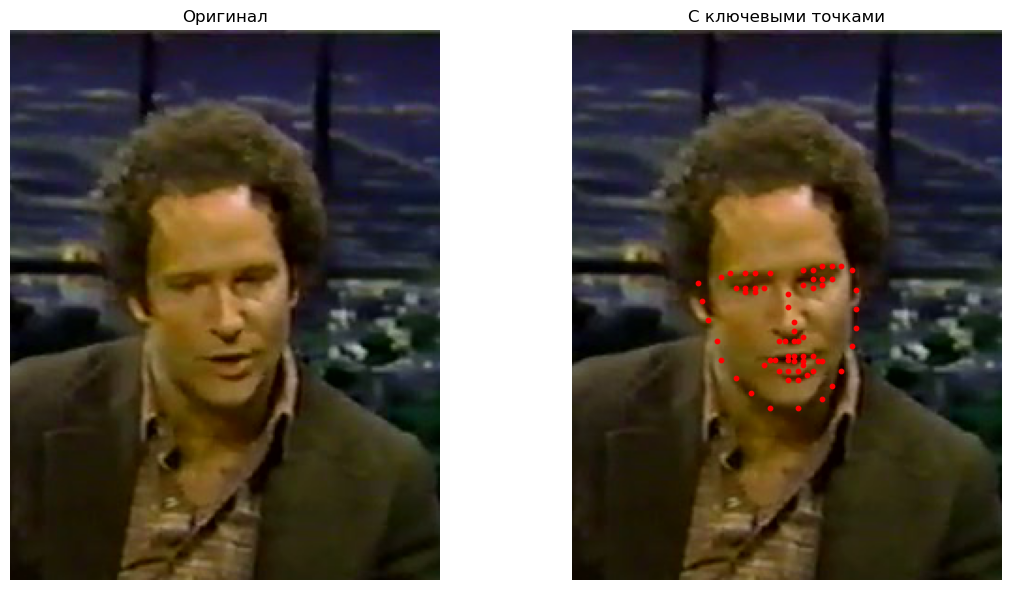

In [20]:
path_annotation='dataset/dataset_3/train.csv'
path_image='dataset/dataset_3/train'
img_show(path_image, path_annotation, 5)

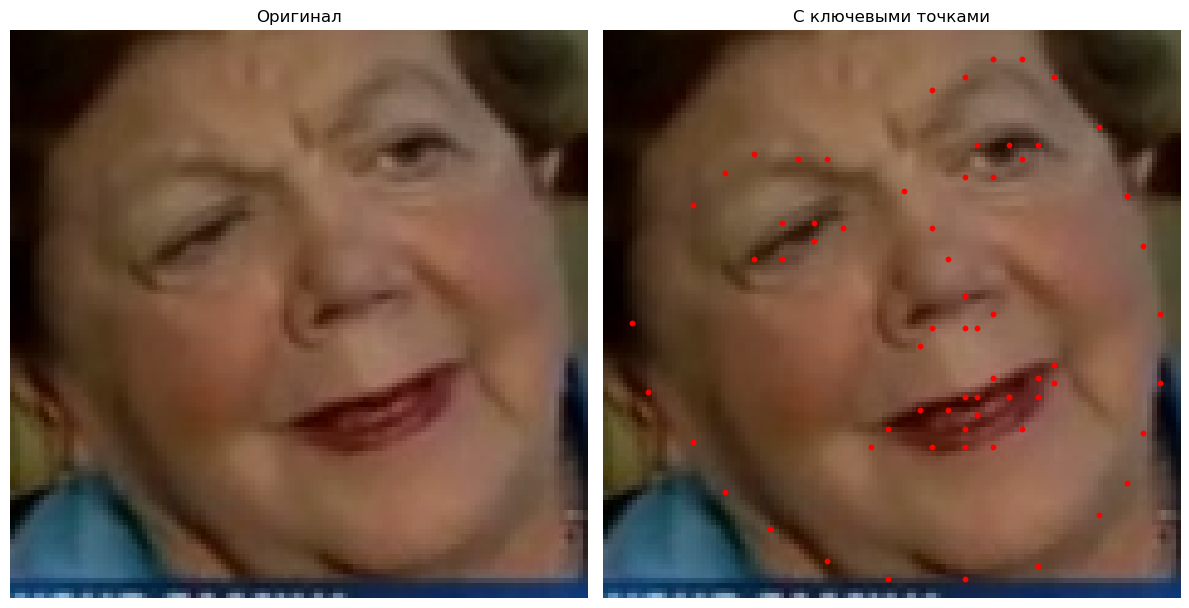

In [21]:
path_annotation='dataset/dataset_3/train_2.csv'
path_image='dataset/dataset_3/train_2'
img_show(path_image, path_annotation, 25)

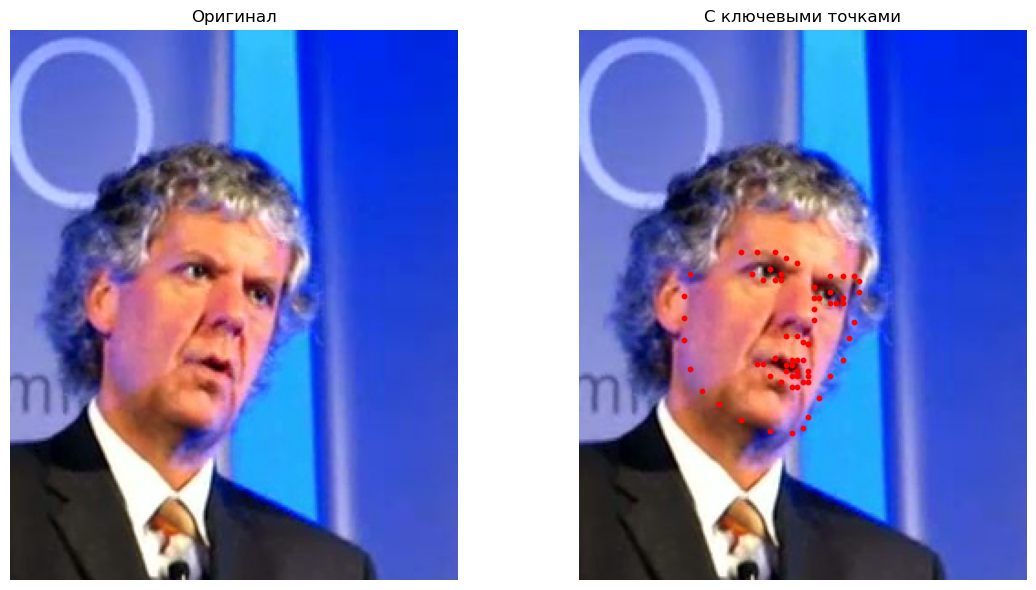

In [22]:
path_annotation='dataset/dataset_3/test.csv'
path_image='dataset/dataset_3/test'
img_show(path_image, path_annotation, 212)

## Загрузка с датасета

In [ ]:
from torchvision import transforms


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),   
 
])

path_annotation='dataset/dataset_3/train.csv'
path_image='dataset/dataset_3/train'


train_dataset = FaceKeypointsDataset(
    csv_file=path_annotation,
    root_dir=path_image,
    transform=transform
)

path_annotation='dataset/dataset_3/test.csv'
path_image='dataset/dataset_3/test'

val_dataset = FaceKeypointsDataset(
    csv_file=path_annotation,
    root_dir=path_image,
    transform=transform
)

# DataLoader для обучения
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

# DataLoader для обучения
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=0)


### Просмотр датасета с даталоадера

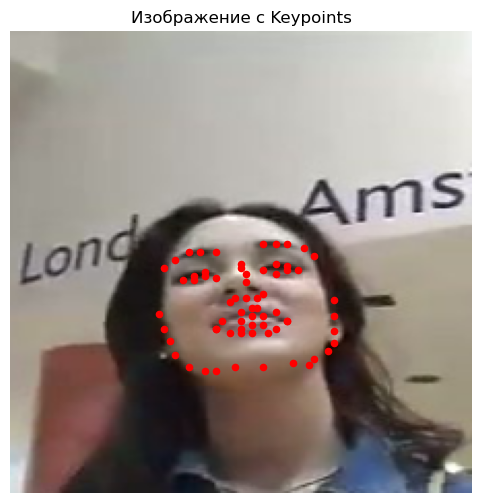

In [24]:
batch = next(iter(train_loader))

show_batch_with_keypoints(batch, batch_idx=0)

# 2) Модель

In [25]:
import pandas as pd

df = pd.read_csv('dataset/dataset_3/train.csv')
num_columns = len(df.columns)
num_keypoints = (num_columns - 1) // 2  # -1 за счет столбца с именем изображения

print(f'Количество ключевых точек: {num_keypoints}')

Количество ключевых точек: 68


In [26]:
num_keypoints = 68  
model = KeypointNet(num_keypoints=num_keypoints)

# 3) Тренировка

Epoch 1/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.67it/s]


Epoch 1/40 | Train Loss: 3.1419 | Val Loss: 3.4211
Сохранена лучшая модель на эпохе  1 с val loss 3.4211


Epoch 2/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.62it/s]


Epoch 2/40 | Train Loss: 3.1125 | Val Loss: 3.3804
Сохранена лучшая модель на эпохе  2 с val loss 3.3804


Epoch 3/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.66it/s]


Epoch 3/40 | Train Loss: 3.0903 | Val Loss: 3.3854


Epoch 4/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


Epoch 4/40 | Train Loss: 3.1052 | Val Loss: 3.4042


Epoch 5/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.66it/s]


Epoch 5/40 | Train Loss: 3.0969 | Val Loss: 3.3808


Epoch 6/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.65it/s]


Epoch 6/40 | Train Loss: 3.0743 | Val Loss: 3.3457
Сохранена лучшая модель на эпохе  6 с val loss 3.3457


Epoch 7/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.57it/s]


Epoch 7/40 | Train Loss: 3.0580 | Val Loss: 3.4856


Epoch 8/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.44it/s]


Epoch 8/40 | Train Loss: 3.0747 | Val Loss: 3.4414


Epoch 9/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.67it/s]


Epoch 9/40 | Train Loss: 3.0501 | Val Loss: 3.4735


Epoch 10/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.43it/s]


Epoch 10/40 | Train Loss: 3.0726 | Val Loss: 3.5103


Epoch 11/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.41it/s]


Epoch 11/40 | Train Loss: 3.0711 | Val Loss: 3.4518


Epoch 12/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


Epoch 12/40 | Train Loss: 3.0451 | Val Loss: 3.4365


Epoch 13/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.67it/s]


Epoch 13/40 | Train Loss: 2.9446 | Val Loss: 3.3630


Epoch 14/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.66it/s]


Epoch 14/40 | Train Loss: 2.9019 | Val Loss: 3.3777


Epoch 15/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


Epoch 15/40 | Train Loss: 2.8975 | Val Loss: 3.3993


Epoch 16/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.68it/s]


Epoch 16/40 | Train Loss: 2.9398 | Val Loss: 3.4205


Epoch 17/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]


Epoch 17/40 | Train Loss: 2.8773 | Val Loss: 3.4097


Epoch 18/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


Epoch 18/40 | Train Loss: 2.8814 | Val Loss: 3.4195


Epoch 19/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.68it/s]


Epoch 19/40 | Train Loss: 2.8247 | Val Loss: 3.3296
Сохранена лучшая модель на эпохе  19 с val loss 3.3296


Epoch 20/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.68it/s]


Epoch 20/40 | Train Loss: 2.8074 | Val Loss: 3.3976


Epoch 21/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.76it/s]


Epoch 21/40 | Train Loss: 2.8111 | Val Loss: 3.3678


Epoch 22/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]


Epoch 22/40 | Train Loss: 2.8027 | Val Loss: 3.3482


Epoch 23/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.79it/s]


Epoch 23/40 | Train Loss: 2.8198 | Val Loss: 3.3540


Epoch 24/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.71it/s]


Epoch 24/40 | Train Loss: 2.8131 | Val Loss: 3.3756


Epoch 25/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]


Epoch 25/40 | Train Loss: 2.8023 | Val Loss: 3.3605


Epoch 26/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]


Epoch 26/40 | Train Loss: 2.7936 | Val Loss: 3.3370


Epoch 27/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.78it/s]


Epoch 27/40 | Train Loss: 2.7723 | Val Loss: 3.3607


Epoch 28/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.81it/s]


Epoch 28/40 | Train Loss: 2.7721 | Val Loss: 3.3747


Epoch 29/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.60it/s]


Epoch 29/40 | Train Loss: 2.7884 | Val Loss: 3.3749


Epoch 30/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


Epoch 30/40 | Train Loss: 2.7768 | Val Loss: 3.3926


Epoch 31/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.68it/s]


Epoch 31/40 | Train Loss: 2.7693 | Val Loss: 3.3864


Epoch 32/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.60it/s]


Epoch 32/40 | Train Loss: 2.7684 | Val Loss: 3.3689


Epoch 33/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.56it/s]


Epoch 33/40 | Train Loss: 2.7449 | Val Loss: 3.3839


Epoch 34/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.60it/s]


Epoch 34/40 | Train Loss: 2.7706 | Val Loss: 3.3632


Epoch 35/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.56it/s]


Epoch 35/40 | Train Loss: 2.7509 | Val Loss: 3.3402


Epoch 36/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.90it/s]


Epoch 36/40 | Train Loss: 2.7492 | Val Loss: 3.3646


Epoch 37/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.90it/s]


Epoch 37/40 | Train Loss: 2.7543 | Val Loss: 3.3684


Epoch 38/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.83it/s]


Epoch 38/40 | Train Loss: 2.7473 | Val Loss: 3.3813


Epoch 39/40 [Val]: 100%|██████████| 25/25 [00:02<00:00, 10.04it/s]


Epoch 39/40 | Train Loss: 2.7553 | Val Loss: 3.3618


Epoch 40/40 [Val]: 100%|██████████| 25/25 [00:02<00:00,  9.70it/s]


Epoch 40/40 | Train Loss: 2.7382 | Val Loss: 3.3558


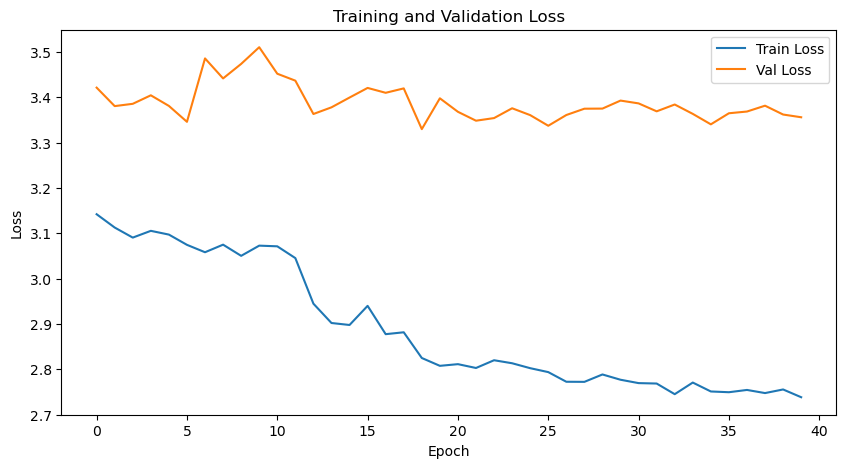

In [33]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('models/best_model.pth', map_location='cpu'))
model.to(device)
optimizer = Adam(model.parameters(), lr=0.0003)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)  
criterion = torch.nn.MSELoss()

trained_model, train_losses, val_losses = train(
    model, train_loader, val_loader, optimizer, criterion, scheduler, device, num_epochs=40, save_path='models/best_model.pth'
)


#  Работа модели детекции точек

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('models/best_model.pth', map_location='cpu')) 

model.eval()
model.to(device);

path_image = 'dataset/dataset_3/test/15096.jpg'

torch.Size([3, 224, 224])


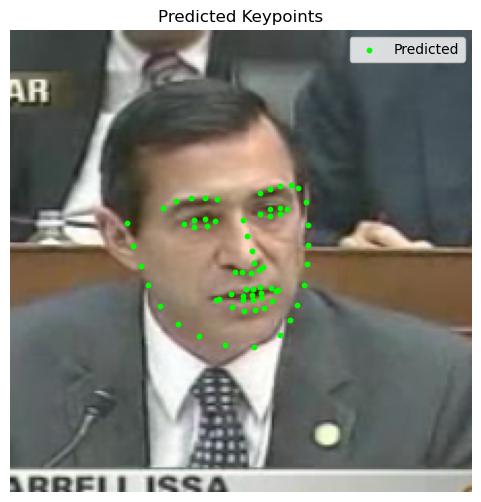

In [35]:
# Визуализация
show_image_with_predictions(path_image, model, device)


torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


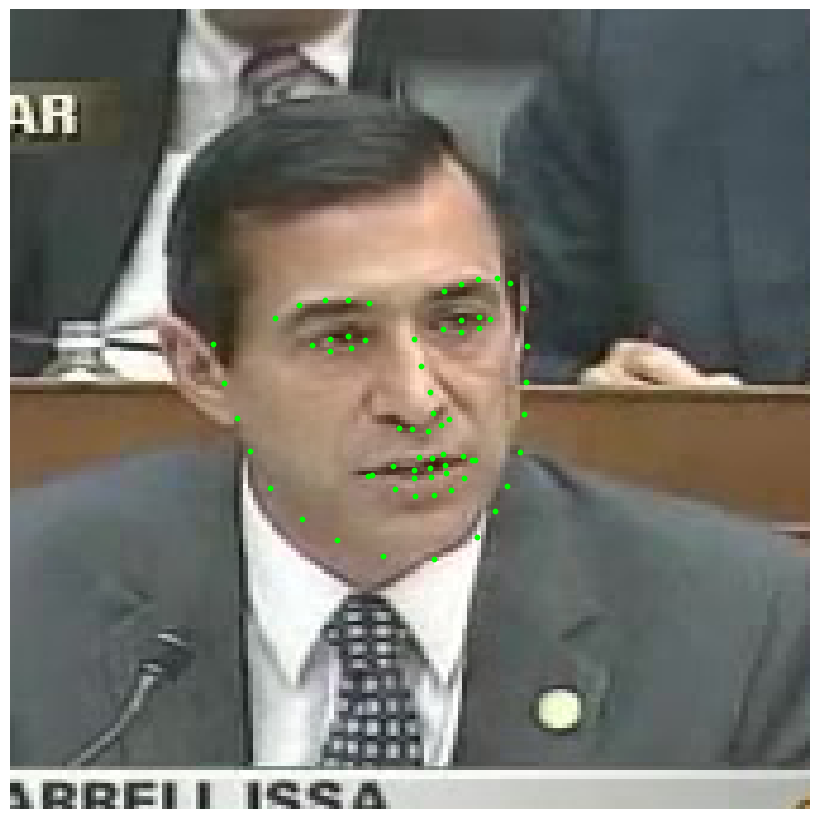

In [36]:
show_original_image_with_predictions(path_image, model, device, model_input_size=(224, 224))
